# Entrega 5 CNN

Primero vamos a comprobar que tenemos GPU disponible

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12776298569041526338
xla_global_id: -1
]


Ahora vamos a cargar el dataset, en esta caso CIFAR10. Este contiene 50000 imágenes a color de 32x32 para el entrenamiento y 10000 para el test, divididas en 10 categorias.

In [2]:
import tensorflow.keras
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


truck


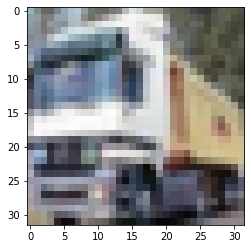

In [3]:
import matplotlib.pyplot as plt

# Creamos las categorias para poder interpretar los resultados
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.imshow(x_train[1])
print(class_names[y_train[1][0]])

Preparamos los datos

In [4]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Se normalizan las imagenes. Cada canal del pixel entre 0. y 1.
# x_train = x_train.astype('float32') / 255
# x_test = x_test.astype('float32') / 255

# Creamos el One Hot para las clases
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

train_generator = datagen.flow(x_train, y_train, batch_size=32, subset='training')

validation_generator = datagen.flow(x_train, y_train, batch_size=8, subset='validation')

# fits the model on batches with real-time data augmentation:
# model.fit(datagen.flow(x_train, y_train, batch_size=32,
#          subset='training'),
#          validation_data=datagen.flow(x_train, y_train,
#          batch_size=8, subset='validation'),
#          steps_per_epoch=len(x_train) / 32, epochs=epochs)


Creamos el modelo

In [5]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import losses
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
# model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))
opt = optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


/home/danipeix/.local/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Entrenamos el modelo

In [6]:
batch_size = 64
num_epoch = 100

model_log = model.fit(train_generator,
          epochs=num_epoch,
          verbose=1,
          validation_data=validation_generator)#,
          #steps_per_epoch=len(x_train) / batch_size)

Epoch 1/100
1250/1250 [==============================] - 77s 62ms/step - loss: 2.0448 - accuracy: 0.2402 - val_loss: 1.8122 - val_accuracy: 0.3373
Epoch 2/100
1250/1250 [==============================] - 77s 61ms/step - loss: 1.8003 - accuracy: 0.3383 - val_loss: 1.6581 - val_accuracy: 0.3840
Epoch 3/100
1250/1250 [==============================] - 76s 61ms/step - loss: 1.6818 - accuracy: 0.3860 - val_loss: 1.5629 - val_accuracy: 0.4262
Epoch 4/100
1250/1250 [==============================] - 77s 61ms/step - loss: 1.6084 - accuracy: 0.4100 - val_loss: 1.5070 - val_accuracy: 0.4546
Epoch 5/100
1250/1250 [==============================] - 76s 61ms/step - loss: 1.5560 - accuracy: 0.4310 - val_loss: 1.4708 - val_accuracy: 0.4678
Epoch 6/100
1250/1250 [==============================] - 77s 61ms/step - loss: 1.5147 - accuracy: 0.4479 - val_loss: 1.4048 - val_accuracy: 0.4928
Epoch 7/100
1250/1250 [==============================] - 77s 62ms/step - loss: 1.4682 - accuracy: 0.4641 - val_loss: 1

1250/1250 [==============================] - 77s 61ms/step - loss: 0.8789 - accuracy: 0.6919 - val_loss: 0.8047 - val_accuracy: 0.7196
Epoch 57/100
1250/1250 [==============================] - 76s 61ms/step - loss: 0.8808 - accuracy: 0.6895 - val_loss: 0.7993 - val_accuracy: 0.7211
Epoch 58/100
1250/1250 [==============================] - 76s 61ms/step - loss: 0.8752 - accuracy: 0.6927 - val_loss: 0.8035 - val_accuracy: 0.7108
Epoch 59/100
1250/1250 [==============================] - 77s 61ms/step - loss: 0.8704 - accuracy: 0.6947 - val_loss: 0.7893 - val_accuracy: 0.7244
Epoch 60/100
1250/1250 [==============================] - 77s 61ms/step - loss: 0.8697 - accuracy: 0.6939 - val_loss: 0.8025 - val_accuracy: 0.7211
Epoch 61/100
1250/1250 [==============================] - 77s 61ms/step - loss: 0.8659 - accuracy: 0.6956 - val_loss: 0.8233 - val_accuracy: 0.7095
Epoch 62/100
1250/1250 [==============================] - 77s 61ms/step - loss: 0.8535 - accuracy: 0.6967 - val_loss: 0.8003 

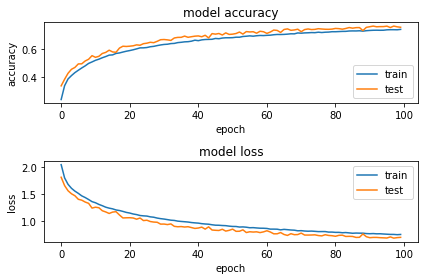

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

Resultados:

    - epochs 250, batch_size 10 -> loss: 1.2901 - accuracy: 0.5482 - val_loss: 1.3121 - val_accuracy: 0.5358 (~1 hora)
    
    - (Con los pesos anteriores) epochs 250, batch_size 40 -> loss: 1.1985 - accuracy: 0.5817 - val_loss: 1.2194 - val_accuracy: 0.5712 (~20 min)

In [8]:
#Save the model
# serialize model to JSON
model_digit_json = model.to_json()
with open("modelCNN1_digit.json", "w") as json_file:
    json_file.write(model_digit_json)
# serialize weights to HDF5
model.save_weights("modelCNN1_digit.h5")
print("Saved model to disk")

Saved model to disk
